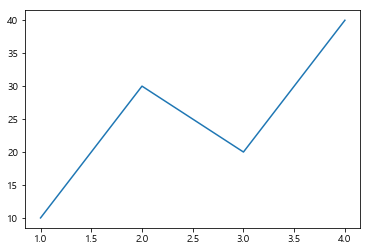

In [10]:
from matplotlib import pyplot
pyplot.plot([1,2,3,4],[10,30,20,40])


<h1> 전국 유료 관광지 입장객</h1>

In [7]:
import os
import sys
import urllib.request
import datetime
import time
import json
#from ..config import *
import math

def get_request_url(url):
    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 1]

def getTourPointVisitor(yyyymm, sido, gungu, nPagenum, nItems):
    
    end_point = "http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList"
    
    parameters = "?_type=json&serviceKey=" + "accesskey" 
    parameters += "&YM=" + yyyymm
    parameters += "&SIDO=" + urllib.parse.quote(sido)
    parameters += "&GUNGU=" + urllib.parse.quote(gungu)
    parameters += "&RES_NM=&pageNo=" + str(nPagenum)
    parameters += "&numOfRows=" + str(nItems)

    url = end_point + parameters
    
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

#[CODE 2]

def getTourPointData(item, yyyymm, jsonResult):
    
    addrCd = 0 if 'addrCd' not in item.keys() else item['addrCd']
    gungu = '' if 'gungu' not in item.keys() else item['gungu']
    sido = '' if 'sido' not in item.keys() else item['sido']
    resNm = '' if 'resNm' not in item.keys() else item['resNm']
    rnum = 0 if 'rnum' not in item.keys() else item['rnum']
    ForNum = 0 if 'csForCnt' not in item.keys() else item['csForCnt']
    NatNum = 0 if 'csNatCnt' not in item.keys() else item['csNatCnt']
    
    jsonResult.append({'yyyymm': yyyymm, 'addrCd': addrCd,
                    'gungu': gungu, 'sido': sido, 'resNm': resNm, 
                    'rnum': rnum, 'ForNum': ForNum, 'NatNum': NatNum})
    return    

def main():

    jsonResult = []

    sido = '서울특별시'
    gungu = ''
    nPagenum = 1
    nTotal = 0
    nItems = 100
    
    nStartYear = 2011
    nEndYear = 2017

    for year in range(nStartYear, nEndYear):
        for month in range(1, 13):

            yyyymm = "{0}{1:0>2}".format(str(year), str(month))

            nPagenum = 1

            #[CODE 3]

            while True:
                jsonData = getTourPointVisitor(yyyymm, sido, gungu, nPagenum, nItems)
    
                if (jsonData['response']['header']['resultMsg'] == 'OK'):
                    nTotal = jsonData['response']['body']['totalCount']
            
                    if nTotal == 0:
                        break

                    for item in jsonData['response']['body']['items']['item']:
                        getTourPointData(item, yyyymm, jsonResult)
            
                    nPage = math.ceil(nTotal / 100)
                    if (nPagenum == nPage):
                        break

                    nPagenum += 1
                
                else:
                    break
    
    with open('%s_관광지입장정보_%d_%d.json' % (sido, nStartYear, nEndYear-1), 'w', encoding='utf8') as outfile:
        retJson = json.dumps(jsonResult,
                        indent=4, sort_keys=True,
                        ensure_ascii=False)
        outfile.write(retJson)
        
    print ('%s_관광지입장정보_%d_%d.json SAVED' % (sido, nStartYear, nEndYear-1))            
    
if __name__ == '__main__':
    main()


[2018-04-30 21:37:17.101053] Url Request Success
[2018-04-30 21:37:17.301810] Url Request Success
[2018-04-30 21:37:17.504356] Url Request Success
[2018-04-30 21:37:17.705552] Url Request Success
[2018-04-30 21:37:17.903690] Url Request Success
[2018-04-30 21:37:18.101203] Url Request Success
[2018-04-30 21:37:18.306749] Url Request Success
[2018-04-30 21:37:18.511296] Url Request Success
[2018-04-30 21:37:18.711150] Url Request Success
[2018-04-30 21:37:18.913413] Url Request Success
[2018-04-30 21:37:19.114826] Url Request Success
[2018-04-30 21:37:19.312299] Url Request Success
[2018-04-30 21:37:19.514701] Url Request Success
[2018-04-30 21:37:19.718471] Url Request Success
[2018-04-30 21:37:19.918373] Url Request Success
[2018-04-30 21:37:20.122940] Url Request Success
[2018-04-30 21:37:20.326576] Url Request Success
[2018-04-30 21:37:20.528313] Url Request Success
[2018-04-30 21:37:20.738615] Url Request Success
[2018-04-30 21:37:20.946403] Url Request Success
[2018-04-30 21:37:21

<h1> 출입국관광통계서비스 </h1>

[2018-04-30 21:58:01.373313] Url Request Success
중국_201101 : 113927
[2018-04-30 21:58:01.408057] Url Request Success
중국_201102 : 157019
[2018-04-30 21:58:01.445205] Url Request Success
중국_201103 : 163261
[2018-04-30 21:58:01.481615] Url Request Success
중국_201104 : 153875
[2018-04-30 21:58:01.521763] Url Request Success
중국_201105 : 152347
[2018-04-30 21:58:01.558732] Url Request Success
중국_201106 : 179508
[2018-04-30 21:58:01.590860] Url Request Success
중국_201107 : 244573
[2018-04-30 21:58:01.626299] Url Request Success
중국_201108 : 276299
[2018-04-30 21:58:01.660305] Url Request Success
중국_201109 : 231462
[2018-04-30 21:58:01.693085] Url Request Success
중국_201110 : 214681
[2018-04-30 21:58:01.729719] Url Request Success
중국_201111 : 174164
[2018-04-30 21:58:01.763536] Url Request Success
중국_201112 : 159080
[2018-04-30 21:58:01.798660] Url Request Success
중국_201201 : 167022
[2018-04-30 21:58:01.833394] Url Request Success
중국_201202 : 173790
[2018-04-30 21:58:01.867695] Url Request Success

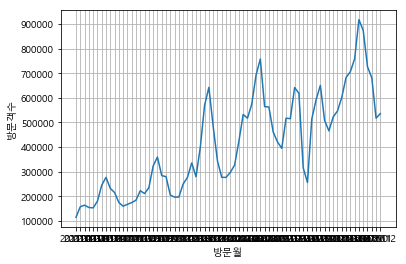

In [13]:
import os
import sys
import urllib.request
import datetime
import time
import json
#from config import *

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

def get_request_url(url):
    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 1]

def getNatVisitor(yyyymm, nat_cd, ed_cd):
    
    end_point = "http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList"
    
    parameters = "?_type=json&serviceKey=" + "accesskey"
    parameters += "&YM=" + yyyymm
    parameters += "&NAT_CD=" + nat_cd
    parameters += "&ED_CD=" + ed_cd
    
    url = end_point + parameters
    
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

def main():

    jsonResult = []

    #중국: 112 / 일본: 130 / 미국: 275

    national_code = "112"
    ed_cd = "E"

    nStartYear = 2011
    nEndYear = 2017

    for year in range(nStartYear, nEndYear):
        for month in range(1, 13):

            yyyymm = "{0}{1:0>2}".format(str(year), str(month))

            jsonData = getNatVisitor(yyyymm, national_code, ed_cd)
    
            if (jsonData['response']['header']['resultMsg'] == 'OK'):
                krName = jsonData['response']['body']['items']['item']["natKorNm"]
                krName = krName.replace(' ', '')
                iTotalVisit = jsonData['response']['body']['items']['item']["num"]
                print('%s_%s : %s' %(krName, yyyymm, iTotalVisit))
                jsonResult.append({'nat_name': krName, 'nat_cd': national_code,
                                 'yyyymm': yyyymm, 'visit_cnt': iTotalVisit})

    cnVisit = []
    VisitYM = []
    index = []
    i = 0
    for item in jsonResult:
        index.append(i)
        cnVisit.append(item['visit_cnt'])
        VisitYM.append(item['yyyymm'])
        i = i + 1
            
    with open('%s(%s)_해외방문객정보_%d_%d.json' % (krName, national_code, nStartYear, nEndYear-1), 'w', encoding='utf8') as outfile:
        retJson = json.dumps(jsonResult,
                        indent=4, sort_keys=True,
                        ensure_ascii=False)
        outfile.write(retJson)
    

    #[CODE 2]

    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xticks(index, VisitYM)
    plt.plot(index, cnVisit)
    plt.xlabel('방문월')
    plt.ylabel('방문객수')
    plt.grid(True)
    plt.show()           
    
if __name__ == '__main__':
    main()